#Case Study 03: Machine Learning

Pada tugas final project modul 3 ini, teman kelas diharapkan bisa mengaplikasikan end to end process machine learning baik itu supervised ataupun unsupervised.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CustomerData.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#cek data yang kosong/na
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
#drop variabel yang tidak terpakai/bukan berformat angka float: cust id
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Visualisasi Densitas Data

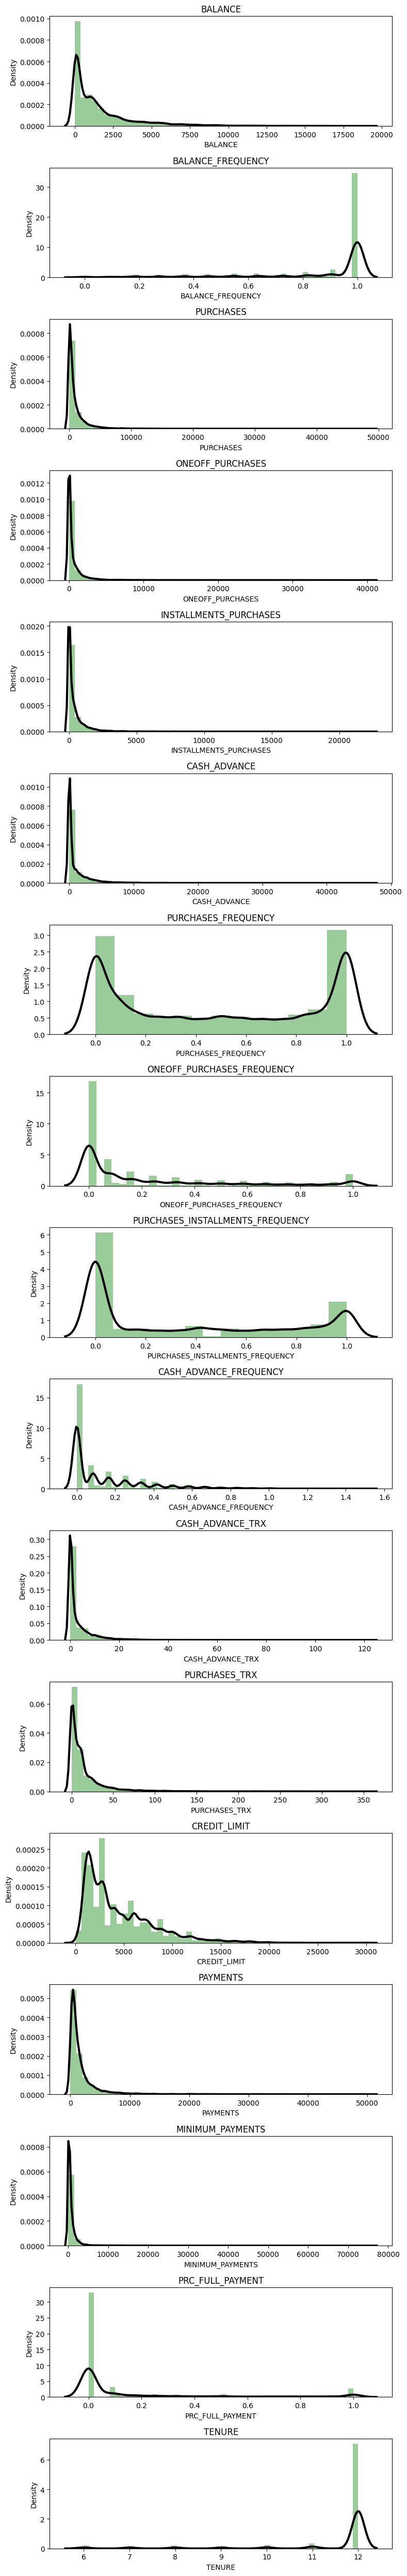

In [ ]:
plt.figure(figsize = (8, 50))
for i in range (0, 17):
    plt.subplot(17, 1, i+1)
    sns.distplot (df[df.columns [i]], kde_kws = {"color" : "black", "bw" : 0.1, "lw": 3, "label" : "KDE"}, hist_kws = {"color" : "g"})
    plt.title (df.columns[i])
plt.tight_layout()

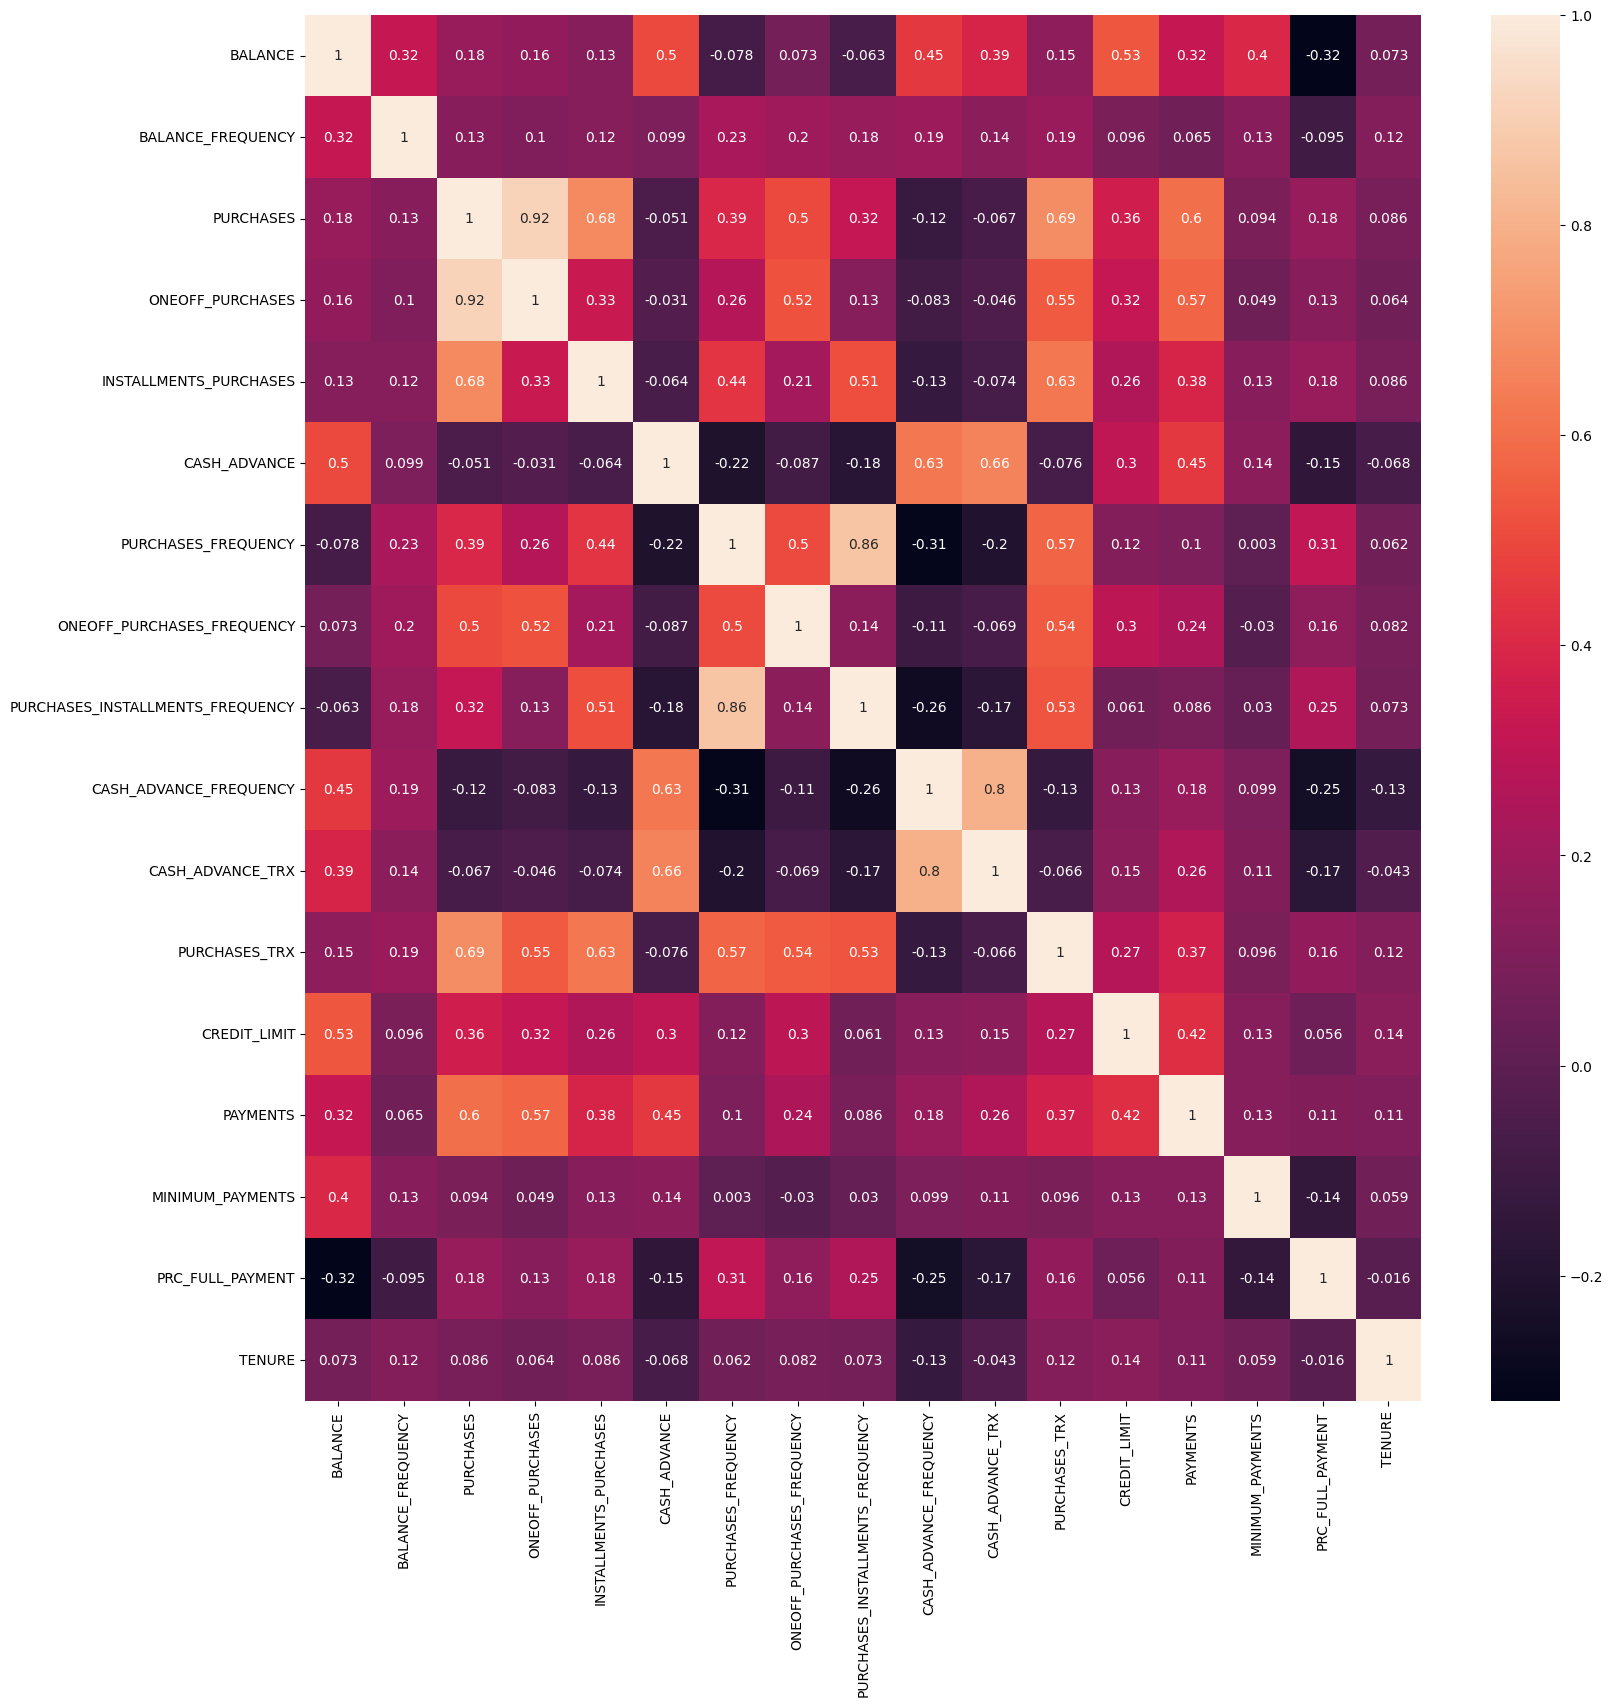

In [ ]:
#memeriksa tingkat korelasi antar variabel
plt.figure (figsize = (18, 18))
sns.heatmap (df.corr(), annot=True)
plt.show()

#Tahapan Machine Learning

In [ ]:
#Import Libraries yang berkaitan dengan machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
#Scalling DataFrame
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [ ]:
#Mengurangi Dimensi jadi 2 dimensi
from sklearn.impute import SimpleImputer
import pandas as pd

# Create an imputer object with mean imputation strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the dataset
imputer.fit(scaled_df)

# Transform the dataset using the imputer
X_imputed = imputer.transform(scaled_df)

# Apply PCA on the imputed data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_imputed)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.680575,-1.077562
1,-1.140977,2.506370
2,0.970406,-0.381559
3,-0.873776,0.041909
4,-1.598300,-0.689773
...,...,...
8945,-0.356714,-2.015044
8946,-0.562866,-1.641368
8947,-0.923589,-1.810531
8948,-2.334985,-0.658099


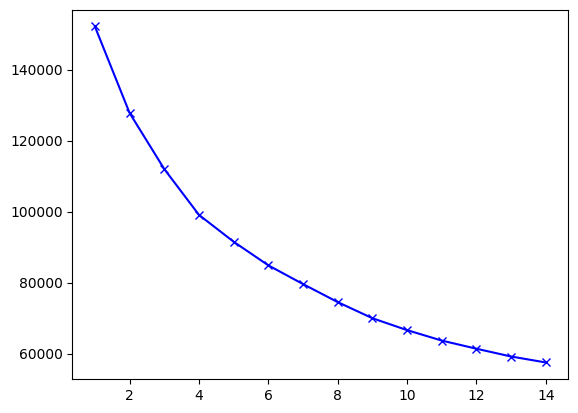

In [ ]:
#Setting Hyperparameter

# Create a pipeline with an imputer and KMeans
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler()),  # Scale the data
    ('kmeans', KMeans(n_clusters=5))  # KMeans with 5 clusters
])

# Create a list of range values for the elbow method
range_val = list(range(1, 15))

# Initialize an empty list to store inertia values
inertia = []

# Iterate over the range of values
for i in range_val:
    # Set the number of clusters for KMeans
    pipeline.named_steps['kmeans'].set_params(n_clusters=i)

    # Fit the pipeline to the data
    pipeline.fit(pd.DataFrame(scaled_df))

    # Append the inertia value to the list
    inertia.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the inertia values
plt.plot(range_val, inertia, 'bx-')

Membuat model dengan metode K-Means

In [ ]:
# Create a pipeline with imputer, scaler, and kmeans
from sklearn.preprocessing import RobustScaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # impute missing values with mean
    ('scaler', RobustScaler()),  # robust scaler
    ('kmeans', KMeans(n_clusters=8))  # kmeans clustering
])

# Fit the pipeline to the data
pipeline.fit(scaled_df)

# Predict the clusters
kmeans_model = pipeline.named_steps['kmeans']
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the dataframe
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': cluster_labels})], axis=1)

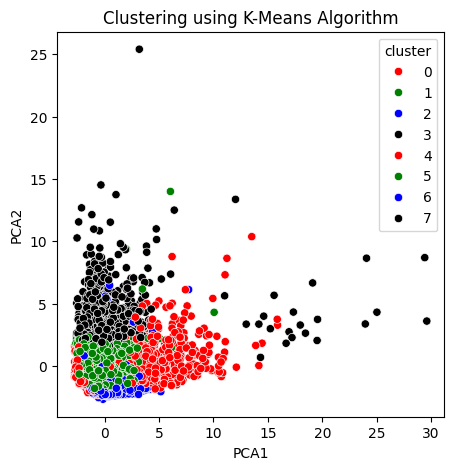

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
#identify cluster centers and transform them
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,786.998741,-0.477237,906.279914,1017.934191,484.931697,1781.390688,0.381036,0.188985,0.382838,0.180469,5.046035,10.772875,4940.066146,2122.728458,713.145416,0.368988,10.790273
1,2178.701739,0.821794,1434.608008,1403.891296,735.980435,1999.772834,0.468931,0.292105,0.450243,0.243977,7.006653,19.929961,4939.461047,2052.169112,1956.180032,0.221556,11.094894
2,751.454800,0.582037,2612.506263,1922.127088,1526.671715,1074.700770,0.634636,0.382933,0.607232,0.145243,3.561704,32.654558,5726.475287,2661.850082,330.655266,1.752823,10.935139
3,6674.650247,0.779480,56951.794093,66191.600992,10921.083914,2888.368180,0.683362,0.958050,0.644642,0.172665,6.428314,199.719498,14063.527545,53761.275318,11603.181464,1.225700,11.426409
4,3762.873513,0.843993,11531.073016,11162.775815,3948.270897,2155.693089,0.698218,0.825827,0.670327,0.203532,6.498190,116.681982,8388.895647,10060.606666,3890.748782,0.613551,11.427212
5,4657.789266,0.850745,2385.338470,1153.374281,1822.880192,3217.723928,0.488615,0.183625,0.517474,0.243685,9.407310,31.533277,5196.725191,3513.497036,51694.394891,0.159957,11.395367
6,7833.710355,0.877271,3703.985627,483.203442,3547.645894,2877.711496,0.524752,0.119592,0.578921,0.188745,7.148407,56.876703,7061.633717,4236.861834,179757.875314,0.153715,11.517318
7,5549.453163,0.794604,1276.553669,1345.253927,622.278550,10745.587799,0.393963,0.260893,0.382133,0.584766,30.132137,16.638501,7880.367962,7735.442883,5208.203333,0.246629,10.875420


In [ ]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [ ]:
cluster1_df = cluster_df[cluster_df["Cluster"]==0]
cluster1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
3,1666.670542,0.636364,1499.00,1499.0,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.6,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0
17,41.089489,0.454545,519.00,0.0,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12,0
22,132.342240,0.636364,815.90,0.0,815.90,0.000000,1.000000,0.000000,1.000000,0.000000,0,17,1800.0,2359.629958,86.329554,0.000000,12,0
46,474.447149,0.500000,109.74,0.0,109.74,1013.659552,0.375000,0.000000,0.250000,0.125000,1,3,1700.0,176.013005,147.199792,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,7.336804,0.333333,74.00,74.0,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,3000.0,214.921009,44.254787,0.000000,6,0
8929,371.527312,0.333333,0.00,0.0,0.00,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.000000,6,0
8937,163.001629,0.666667,0.00,0.0,0.00,274.440466,0.000000,0.000000,0.000000,0.166667,3,0,1000.0,117.738787,60.792450,0.000000,6,0
8938,78.818407,0.500000,0.00,0.0,0.00,1113.186078,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6,0


In [ ]:
cluster2_df = cluster_df[cluster_df["Cluster"]==1]
cluster2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,1


In [ ]:
cluster3_df = cluster_df[cluster_df["Cluster"]==2]
cluster3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
48,229.867179,1.000000,2390.60,1402.93,987.67,0.0,1.000000,0.666667,1.000000,0.0,0,87,3300.0,2543.953559,175.657825,0.916667,12,2
83,42.464430,0.545455,396.00,0.00,396.00,0.0,0.500000,0.000000,0.416667,0.0,0,12,1200.0,725.606194,140.809454,1.000000,12,2
85,134.917202,1.000000,1247.80,1247.80,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,22,16500.0,1275.229436,171.357189,1.000000,12,2
98,4.708041,0.363636,79.00,0.00,79.00,0.0,0.250000,0.000000,0.166667,0.0,0,3,7000.0,217.820198,121.781205,1.000000,12,2
114,175.341651,0.818182,1508.90,1252.36,256.54,0.0,0.666667,0.416667,0.333333,0.0,0,14,5000.0,1884.227778,136.639824,1.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8932,39.552396,1.000000,180.00,0.00,180.00,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,138.203240,86.564172,1.000000,6,2
8934,20.260716,0.833333,110.50,0.00,110.50,0.0,0.666667,0.000000,0.500000,0.0,0,4,1500.0,161.476789,65.936751,0.500000,6,2
8936,108.977282,1.000000,712.50,0.00,712.50,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,605.716356,86.868595,0.750000,6,2
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.000000,6,2


In [ ]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.57583,18621.013310,0.000000,12,3
273,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12,3
501,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12,3
507,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.27662,534.032339,1.000000,12,3
550,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12,3
587,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12,3
970,3108.393701,0.900000,26582.34,15158.90,11423.44,0.000000,0.900000,0.800000,0.800000,0.000000,0,55,28000.0,26557.09724,586.029097,0.875000,10,3
1190,1893.611922,1.000000,22746.81,15795.42,6951.39,0.000000,1.000000,1.000000,1.000000,0.000000,0,140,18000.0,22558.28457,505.125031,1.000000,12,3
1256,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.72785,703.503256,1.000000,12,3
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.000000,1.000000,1.000000,0.583333,0.000000,0,56,17000.0,17575.20083,2465.465414,0.166667,12,3


<Axes: xlabel='Cluster', ylabel='count'>

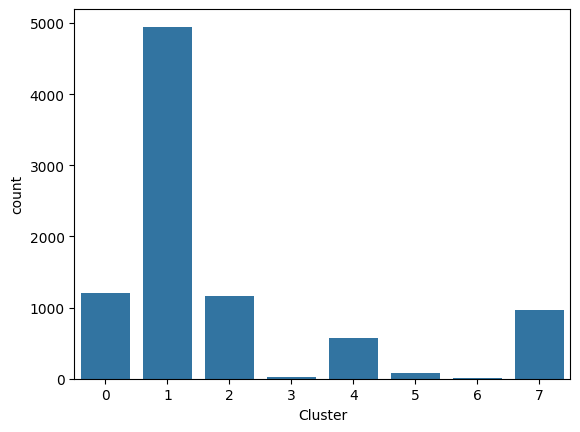

In [ ]:
sns.countplot(x='Cluster', data=cluster_df)

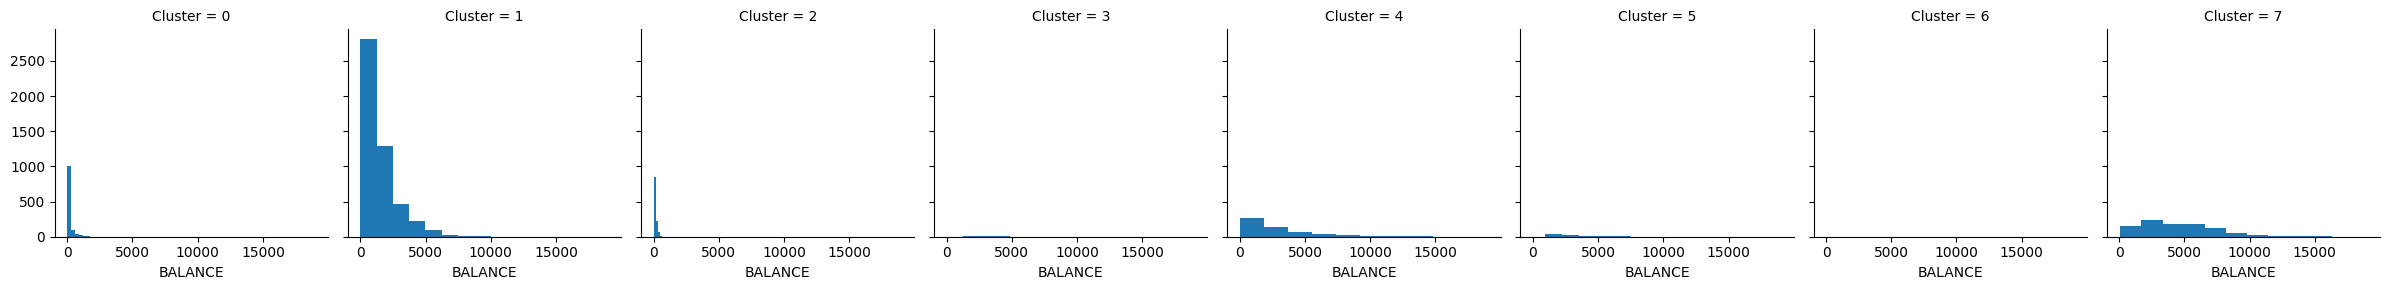

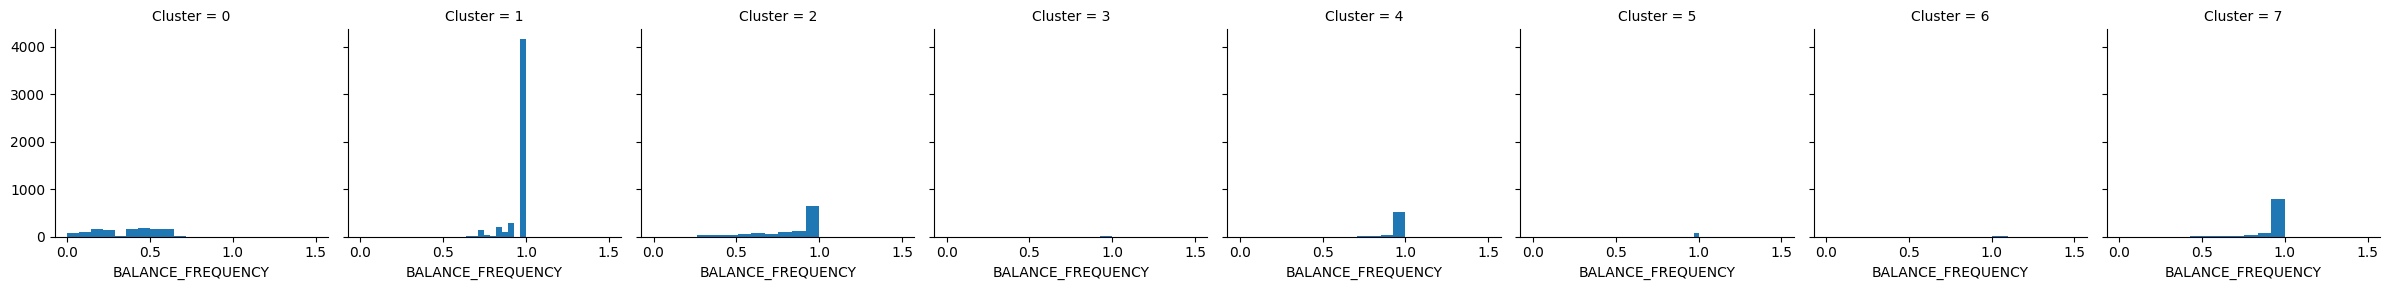

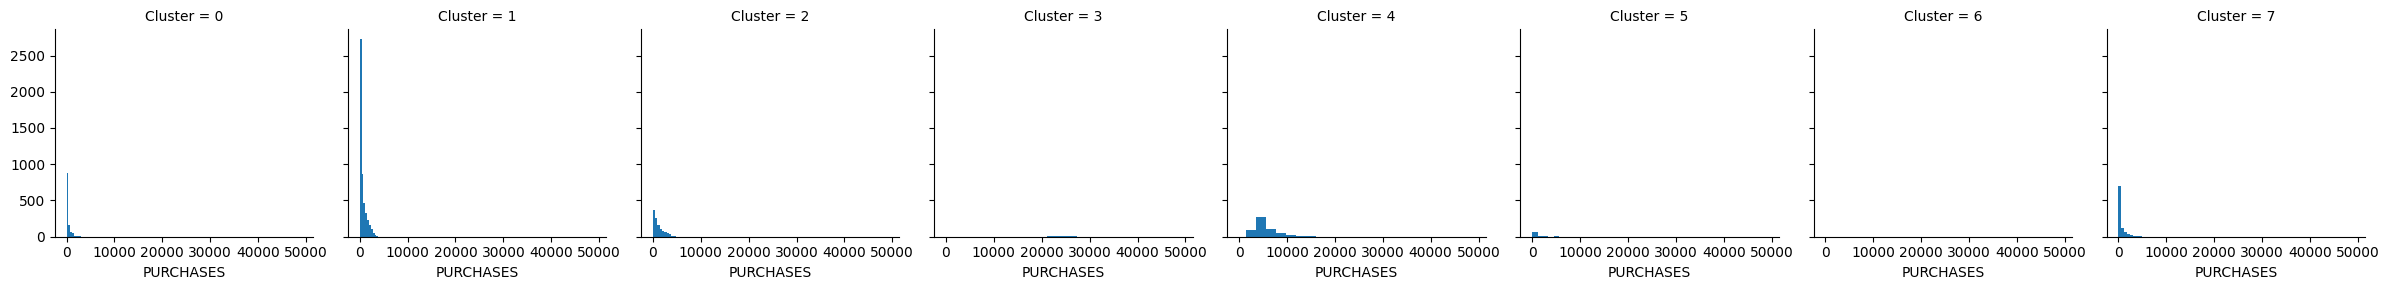

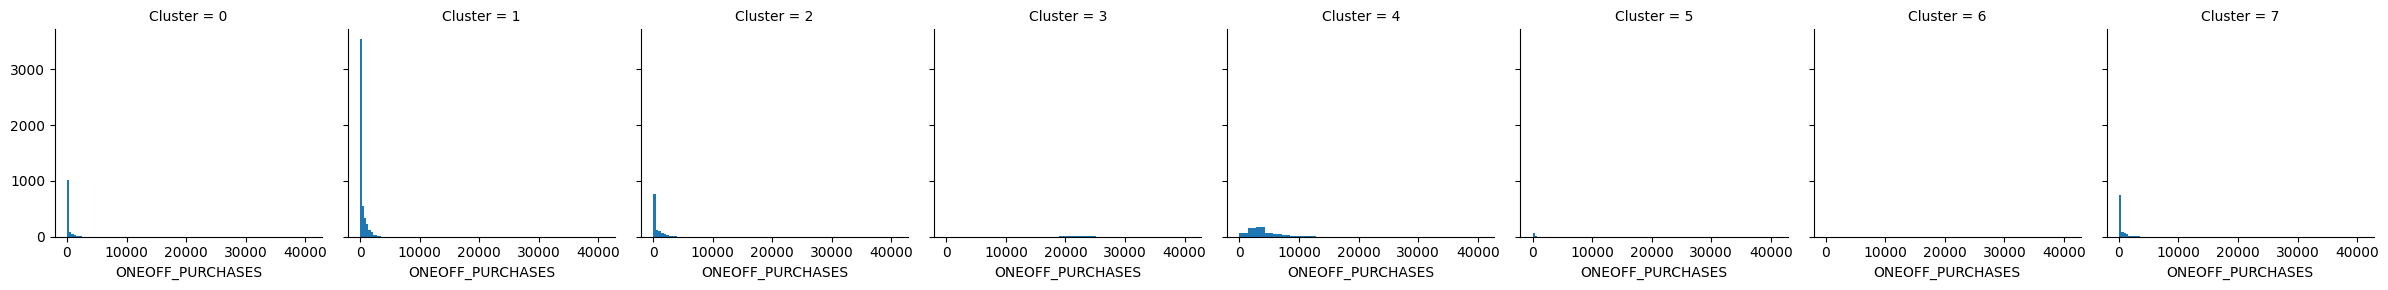

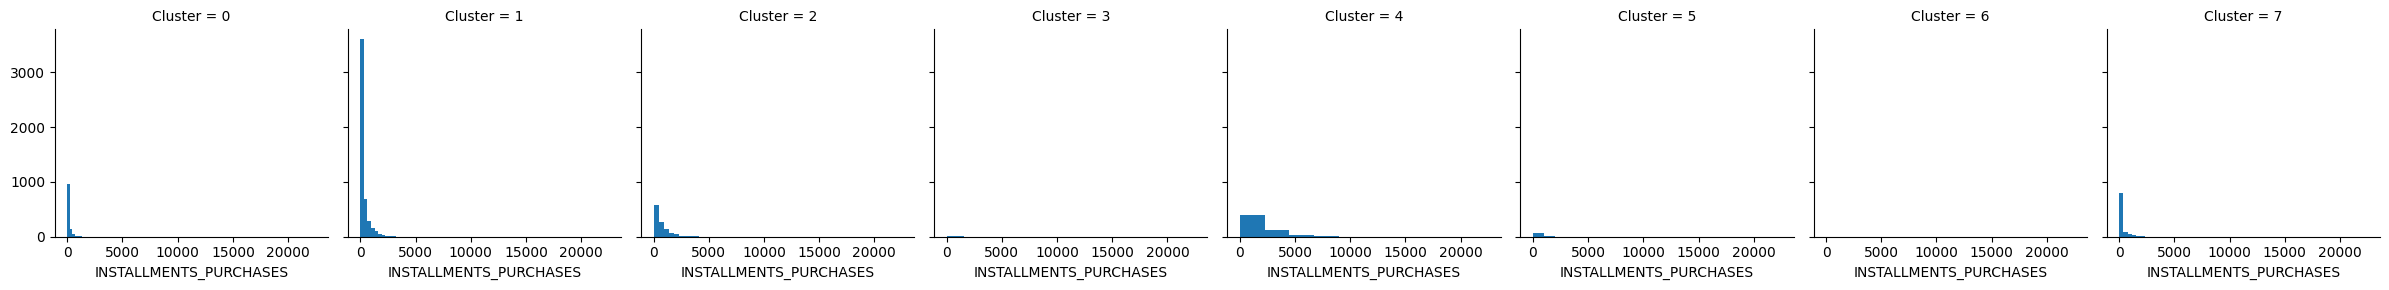

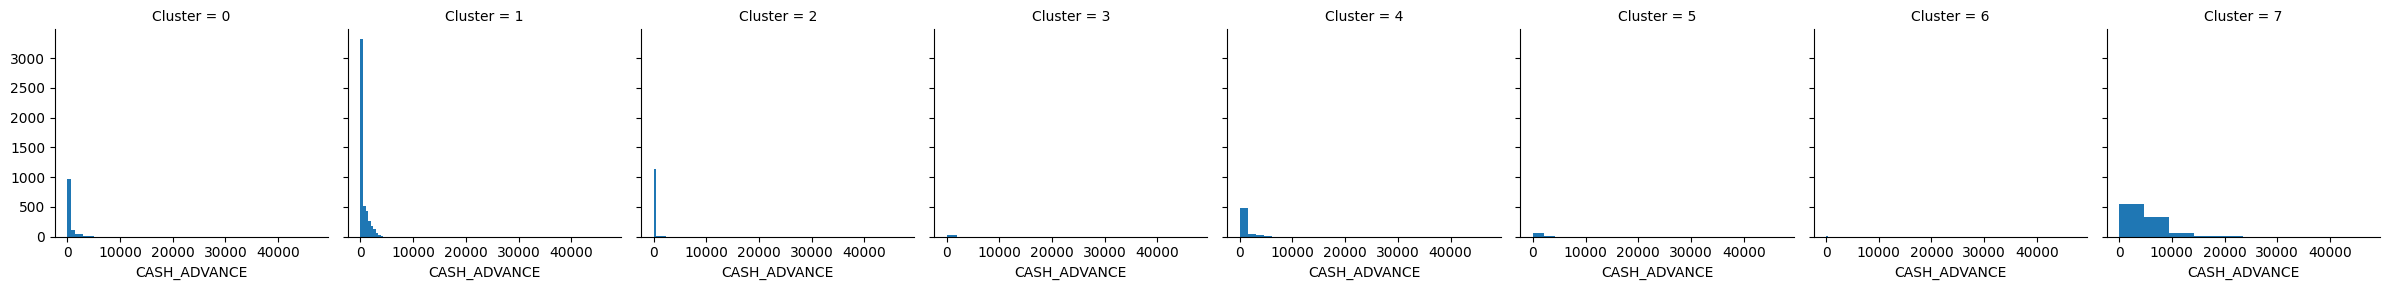

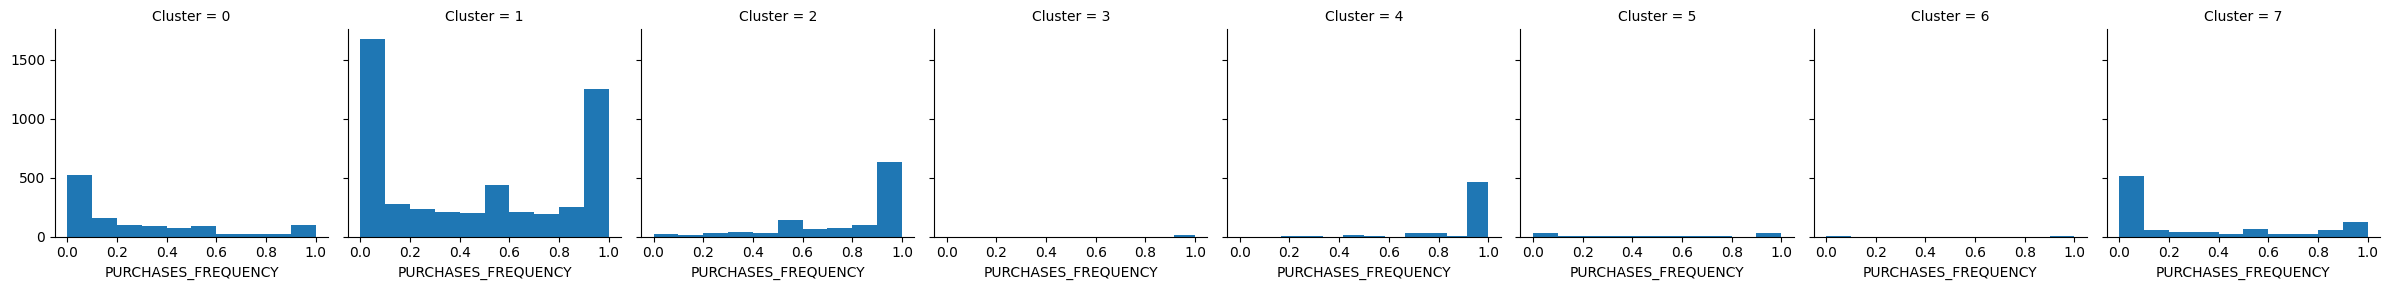

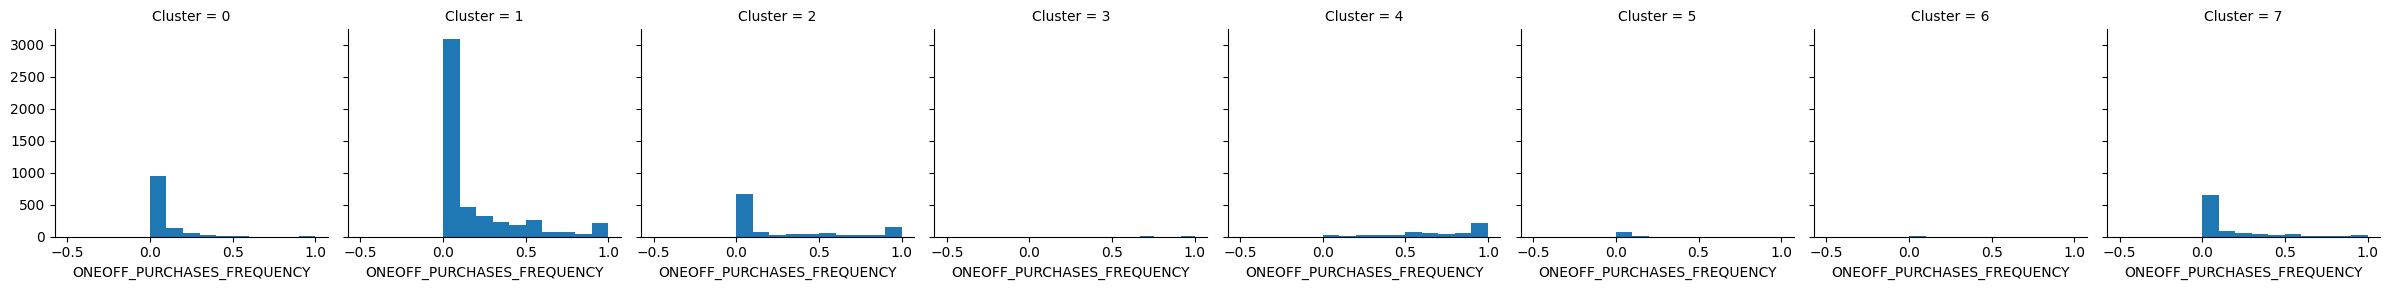

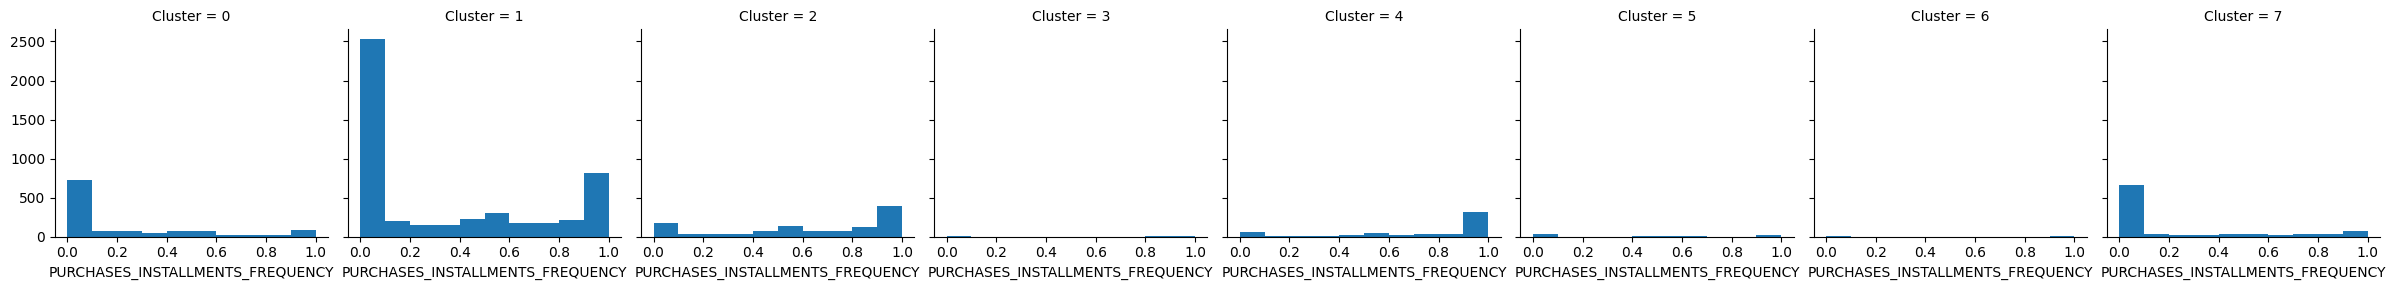

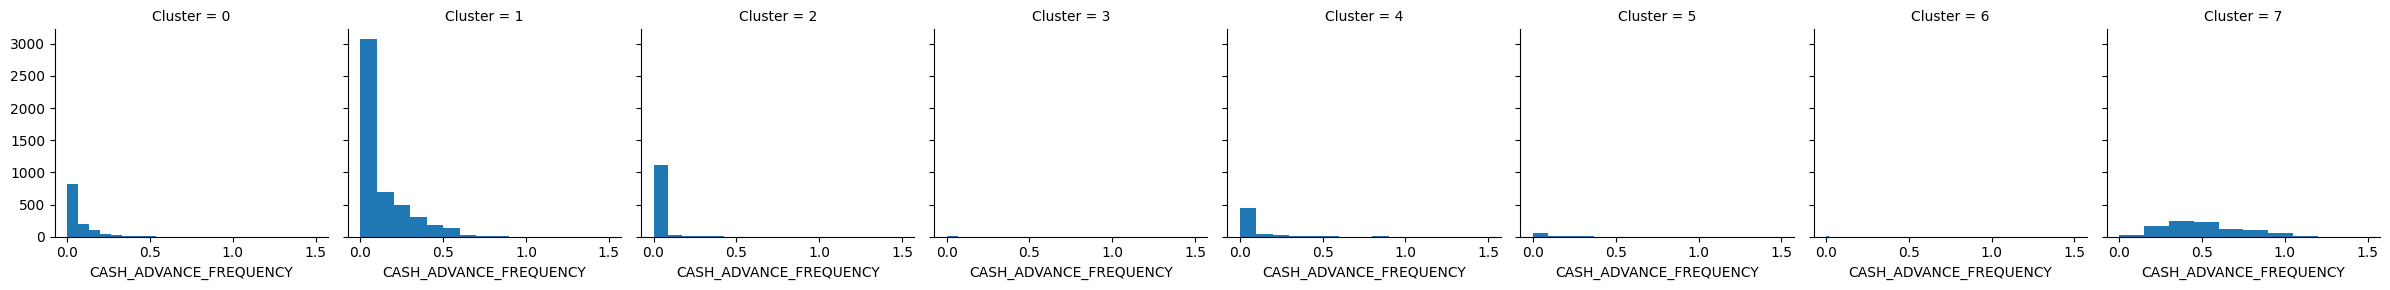

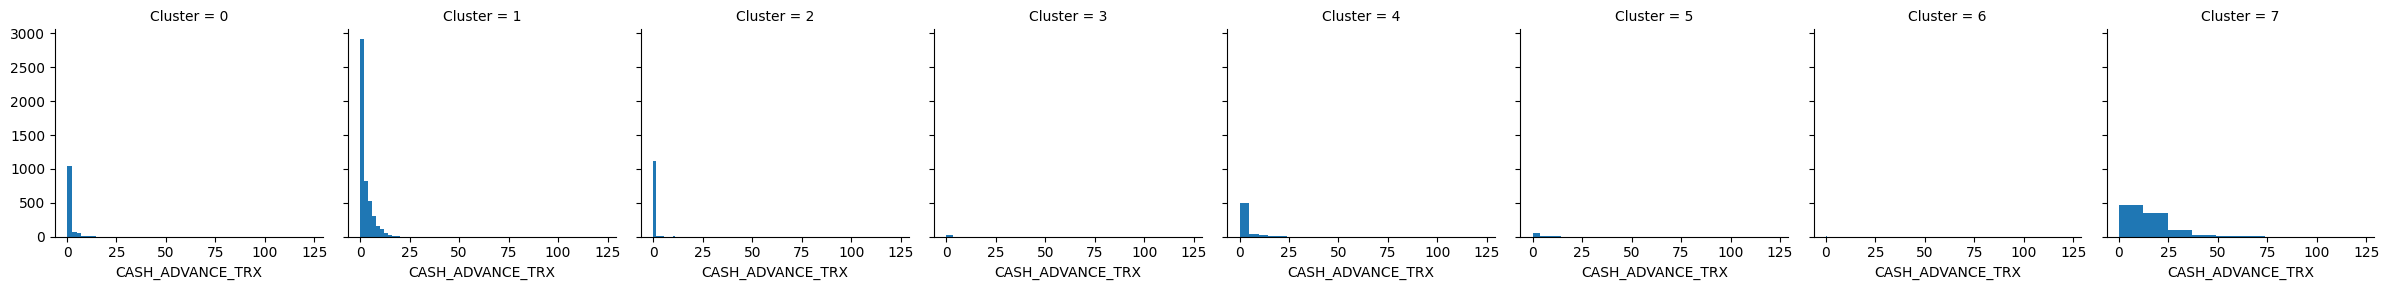

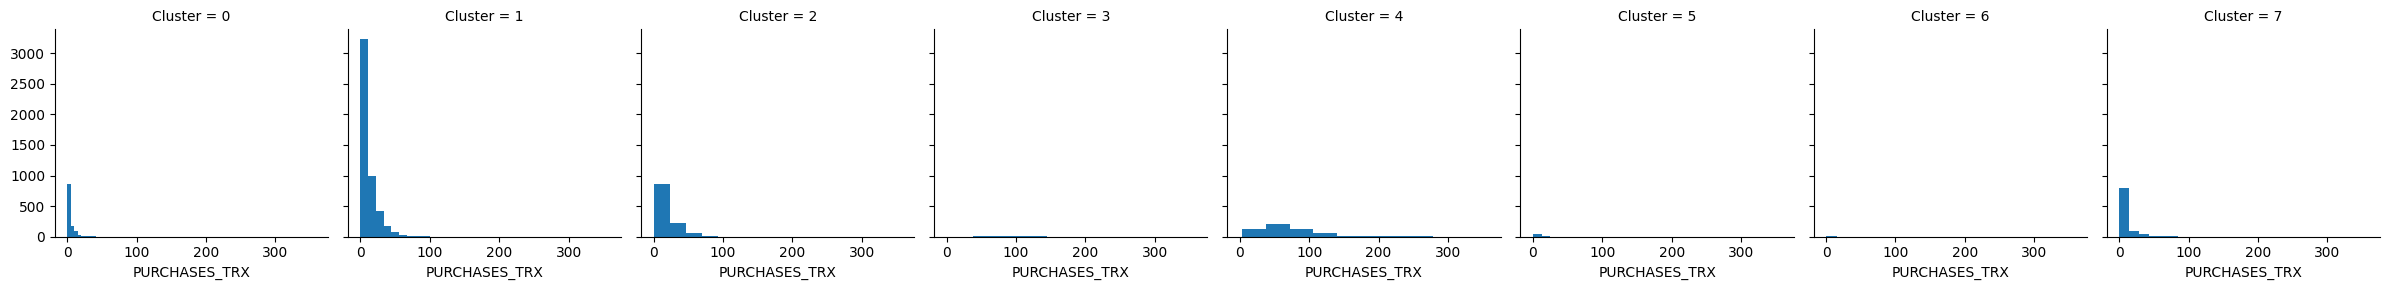

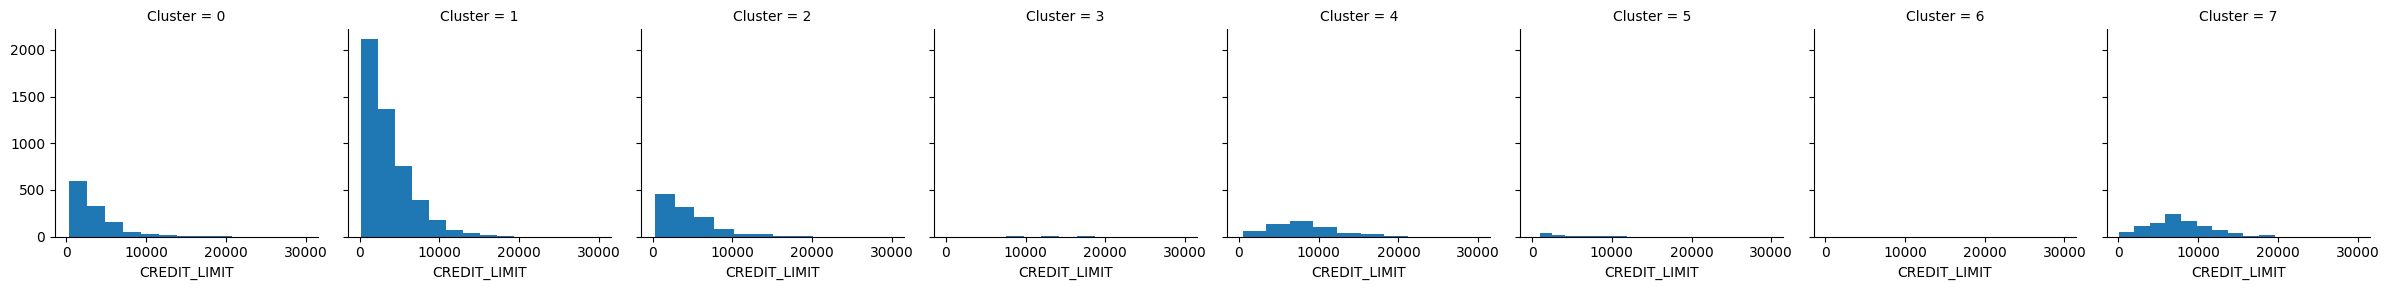

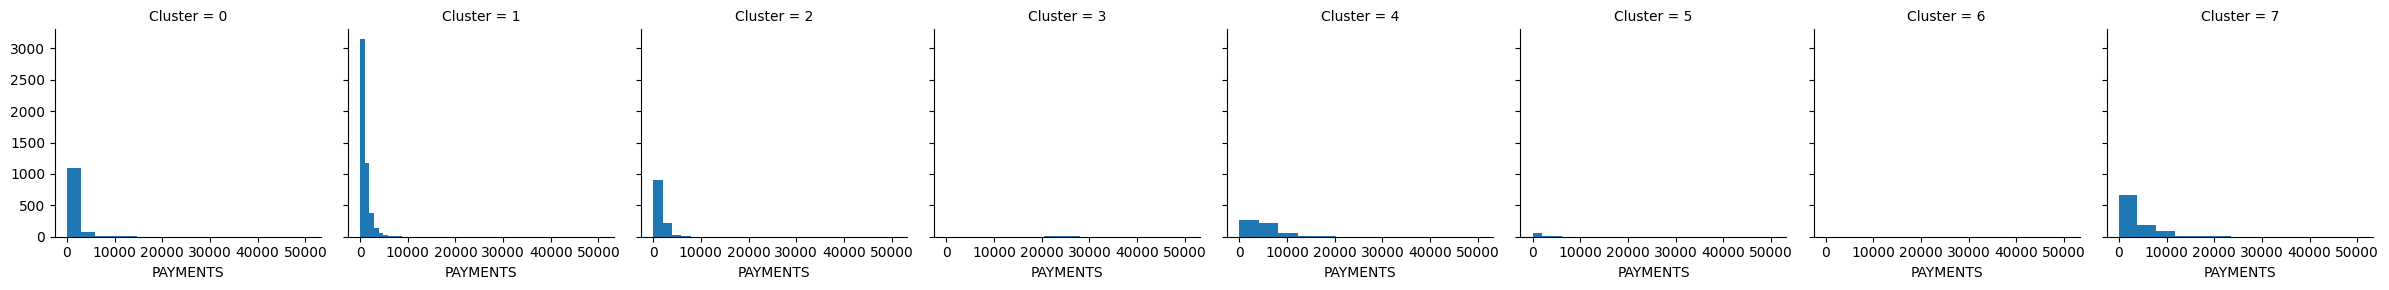

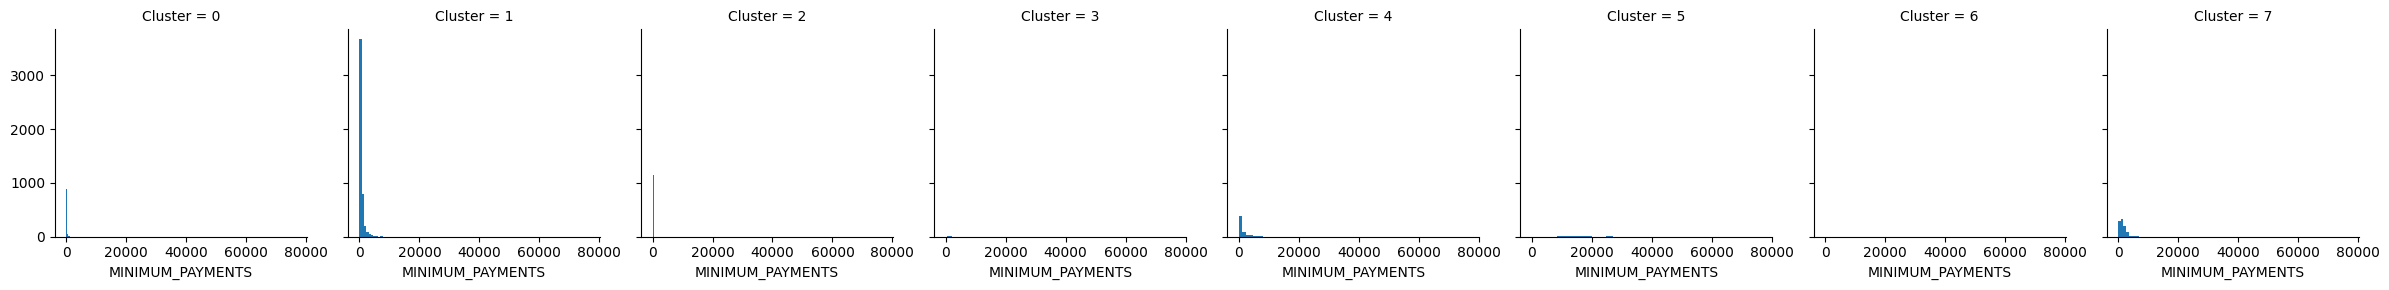

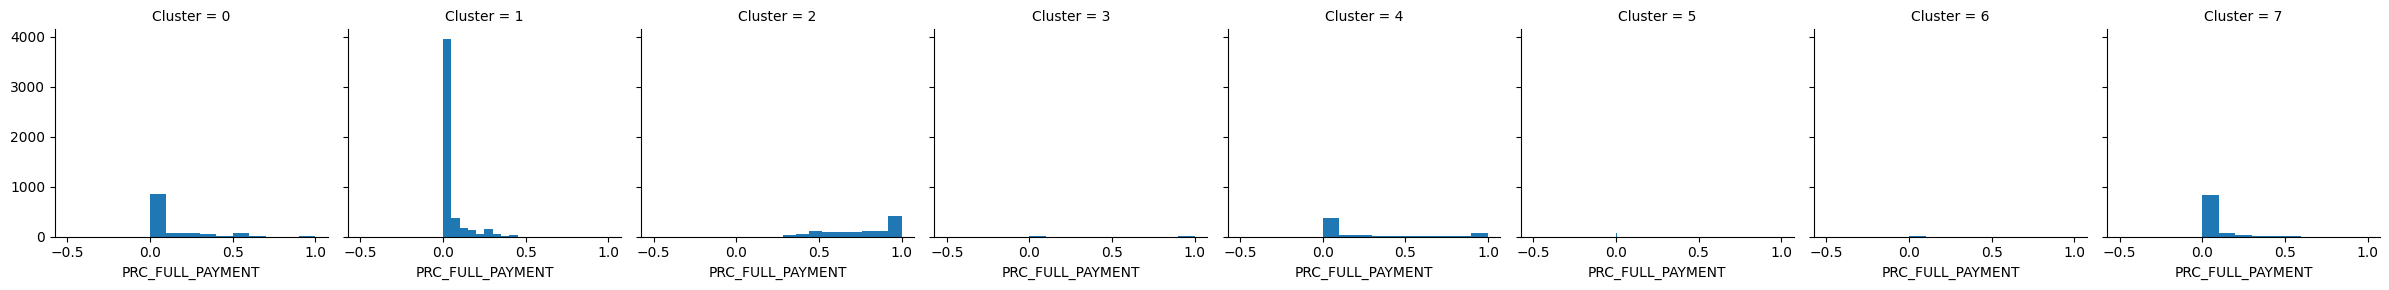

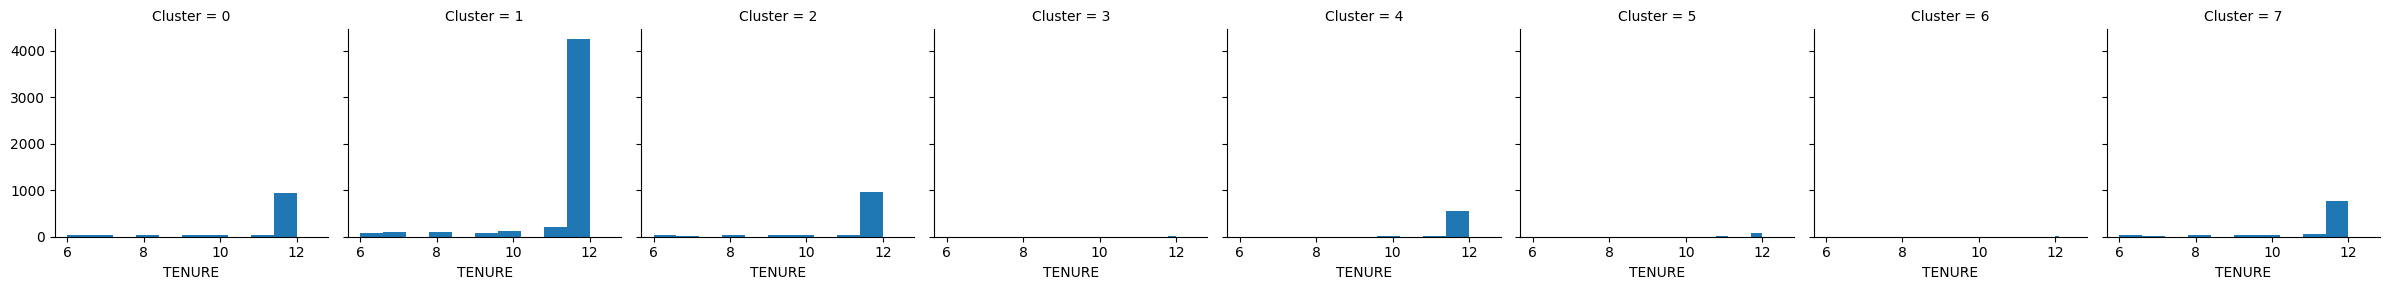

In [ ]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

Training + Testing the Model Accuracy with Decision Tree

In [ ]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=3)

In [ ]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5734,1079.097023,1.0,247.44,0.00,247.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,503.445403,302.481716,0.000000,12
6631,2590.469749,1.0,459.12,422.00,37.12,0.000000,0.333333,0.333333,0.083333,0.000000,0,11,2900.0,584.707120,1369.991379,0.000000,12
8659,945.802599,1.0,540.00,0.00,540.00,912.094948,1.000000,0.000000,0.875000,0.125000,4,15,1000.0,365.497356,1236.864840,0.000000,8
8503,3074.490820,1.0,0.00,0.00,0.00,3382.232089,0.000000,0.000000,0.000000,0.166667,2,0,4000.0,3249.404994,695.004032,0.000000,12
7433,1325.679991,1.0,1084.87,687.57,397.30,3330.913556,0.833333,0.333333,0.833333,0.416667,9,16,3000.0,4135.414563,405.944341,0.090909,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,1653.400854,1.0,100.00,100.00,0.00,2031.677435,0.090909,0.090909,0.000000,0.363636,13,1,2000.0,575.557594,432.921030,0.000000,11
2707,276.446975,1.0,1429.39,100.00,1329.39,0.000000,1.000000,0.083333,1.000000,0.000000,0,21,2800.0,1296.041874,193.607553,0.100000,12
6400,1434.793889,1.0,467.88,467.88,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,4300.0,2538.815988,2898.375147,0.000000,12
1688,4530.639094,1.0,0.00,0.00,0.00,3162.719581,0.000000,0.000000,0.000000,0.250000,5,0,8000.0,995.539176,1032.384353,0.000000,12


In [ ]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5535,76.673877,0.777778,410.90,0.00,410.90,0.000000,0.666667,0.000000,0.555556,0.000000,0,6,1500.0,449.090030,100.105897,0.000000,9
7828,645.406005,1.000000,0.00,0.00,0.00,929.220085,0.000000,0.000000,0.000000,0.333333,4,0,1000.0,193.013564,310.454708,0.000000,12
1680,4977.237859,1.000000,61.99,61.99,0.00,7448.329320,0.083333,0.083333,0.000000,0.500000,22,1,6500.0,6850.235626,1587.042735,0.000000,12
4518,380.517893,1.000000,2590.27,2102.46,487.81,0.000000,0.916667,0.916667,0.416667,0.000000,0,49,2500.0,1825.405687,173.164117,0.090909,12
6131,41.011184,1.000000,1314.75,125.19,1189.56,0.000000,1.000000,0.500000,1.000000,0.000000,0,70,6000.0,1303.104693,135.761304,0.700000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,8097.334733,1.000000,3999.92,200.00,3799.92,0.000000,1.000000,0.083333,1.000000,0.000000,0,14,7500.0,5624.074339,9952.672511,0.000000,12
5034,13.221335,0.857143,108.84,0.00,108.84,0.000000,0.857143,0.000000,0.714286,0.000000,0,9,1500.0,69.973565,85.417572,0.000000,7
1278,1770.072581,1.000000,0.00,0.00,0.00,781.616559,0.000000,0.000000,0.000000,0.083333,1,0,2500.0,1390.781416,845.927334,0.000000,12
285,4246.430225,1.000000,0.00,0.00,0.00,9270.408108,0.000000,0.000000,0.000000,0.666667,16,0,7000.0,6010.525656,1793.262654,0.083333,12


In [ ]:
X_test.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    100
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
X_train.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    213
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Decision Tree Clasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Create a decision tree classifier
model = DecisionTreeClassifier(criterion="entropy")

# Create an imputer object with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

# Fit the model to the imputed training data
model.fit(X_train_imputed, y_train)

# Predict the labels for the imputed test data
y_pred = model.predict(X_test_imputed)

In [ ]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 335    0    3    0    0    0    0    4]
 [   1 1459    7    0   11    0    0   21]
 [   6    7  329    0    4    0    0    1]
 [   0    0    0    8    1    0    0    0]
 [   0    8    3    3  141    0    0    5]
 [   0    1    0    0    0   20    1    3]
 [   0    0    0    0    0    0    1    0]
 [   3   23    2    1    0    0    0  273]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       342
           1       0.97      0.97      0.97      1499
           2       0.96      0.95      0.95       347
           3       0.67      0.89      0.76         9
           4       0.90      0.88      0.89       160
           5       1.00      0.80      0.89        25
           6       0.50      1.00      0.67         1
           7       0.89      0.90      0.90       302

    accuracy                           0.96      2685
   macro avg       0.86      0.92      0.88      2685
weighted avg       0.96      0.96      0.96      2685



Didapatkan akurasi model sebesar 96%

Perbandingan dengan Random Forest Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def create_dataset():
    # Create a synthetic dataset
    cluster_df = pd.DataFrame({
        'Feature1': np.random.rand(500),
        'Feature2': np.random.rand(500),
        'Feature3': np.random.rand(500),
        'Cluster': np.random.randint(0, 2, size=500)  # Target for classification
    })
    return cluster_df

def split_data(df):
    # Separate features and target
    X = df.drop(['Cluster'], axis=1)
    y = df['Cluster']
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def build_pipeline():
    # Build a pipeline with scaling and Random Forest classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    return pipeline

def tune_hyperparameters(pipeline, X_train, y_train):
    # Set up the hyperparameter grid
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30]
    }
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search

def evaluate_model(model, X_test, y_test):
    # Predict using the optimized model on the test data
    y_pred = model.predict(X_test)
    # Evaluate model performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return conf_matrix, report

# Main script
if __name__ == "__main__":
    # Create and split dataset
    cluster_df = create_dataset()
    X_train, X_test, y_train, y_test = split_data(cluster_df)

    # Build and tune model
    pipeline = build_pipeline()
    grid_search = tune_hyperparameters(pipeline, X_train, y_train)

    # Best model from GridSearch
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    conf_matrix, report = evaluate_model(best_model, X_test, y_test)

    # Print results
    print("Best Parameters:", grid_search.best_params_)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__n_estimators': 200}
Confusion Matrix:
 [[16 23]
 [33 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.41      0.36        39
           1       0.55      0.46      0.50        61

    accuracy                           0.44       100
   macro avg       0.44      0.43      0.43       100
weighted avg       0.46      0.44      0.45       100



Didapatkan akurasi modelnya hanya di 44 persen, jauh di bawah akurasi model k-Means sebelumnya di 96 persen